In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from sklearn.model_selection import check_cv, cross_val_score, train_test_split, KFold, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, auc,accuracy_score,roc_auc_score,roc_curve,balanced_accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder,OneHotEncoder

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB

from sklearn.decomposition import PCA

In [4]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [5]:
df  = pd.read_csv("train_fatal.csv")

In [6]:
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [7]:
(df==0).sum()

baseline value                                               0
accelerations                                              712
fetal_movement                                            1048
uterine_contractions                                       256
light_decelerations                                        984
severe_decelerations                                      1694
prolongued_decelerations                                  1557
abnormal_short_term_variability                              0
mean_value_of_short_term_variability                         0
percentage_of_time_with_abnormal_long_term_variability    1004
mean_value_of_long_term_variability                        110
histogram_width                                              0
histogram_min                                                0
histogram_max                                                0
histogram_number_of_peaks                                   83
histogram_number_of_zeroes                             

In [8]:
df.shape

(1700, 22)

In [9]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,...,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,133.213529,0.003212,0.010211,0.004356,0.001899,0.000004,0.000158,46.508824,1.345353,9.738235,...,93.121176,163.842353,4.088824,0.324118,137.128235,134.461176,137.862941,19.046471,0.324706,1.304706
std,9.873344,0.003888,0.050124,0.002943,0.002976,0.000059,0.000587,17.276801,0.898037,18.227303,...,29.520766,17.651851,2.927774,0.683795,16.608926,15.616890,14.552801,29.575447,0.608340,0.614788
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.000000,...,50.000000,122.000000,0.000000,0.000000,60.000000,75.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,128.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,48.000000,1.200000,0.000000,...,93.000000,162.000000,4.000000,0.000000,139.000000,135.500000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.006000,0.003000,0.000000,0.000000,61.000000,1.700000,11.000000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,159.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.000000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [10]:
df.fetal_health.value_counts(normalize=True)

1.0    0.778235
2.0    0.138824
3.0    0.082941
Name: fetal_health, dtype: float64

In [11]:
X = df.drop('fetal_health',axis=1)
y = df.fetal_health

In [12]:
scaler  = StandardScaler()

In [13]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
X_train = scaler.fit_transform(X_train)

In [15]:
X_test  = scaler.fit_transform(X_test)

In [25]:
lr = LogisticRegression(solver= 'liblinear',class_weight={1:0.77, 2:0.13,3:0.08},penalty="l1")
lr_params = {
            'solver': ['liblinear'],
            'penalty': ['l1', 'l2'],
            'class_weight':[{1:0.77, 2:0.13,3:0.08},None]}

#rs_lr = RandomizedSearchCV(lr, lr_params,n_jobs=-1,random_state=42)
lr.fit(X_train,y_train)


LogisticRegression(class_weight={1: 0.77, 2: 0.13, 3: 0.08}, penalty='l1',
                   solver='liblinear')

In [26]:
y_pred = lr.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.87      0.99      0.92       389
         2.0       0.55      0.28      0.37        75
         3.0       0.92      0.52      0.67        46

    accuracy                           0.85       510
   macro avg       0.78      0.60      0.65       510
weighted avg       0.82      0.85      0.82       510



In [27]:
accuracy_score(y_test, y_pred)

0.8450980392156863

In [28]:
cnf_matrix = confusion_matrix(y_test,y_pred)


In [29]:
cnf_matrix

array([[386,   3,   0],
       [ 52,  21,   2],
       [  8,  14,  24]], dtype=int64)

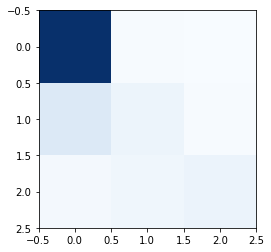

In [35]:
plt.imshow(cnf_matrix, interpolation='nearest',cmap=plt.cm.Blues)

In [37]:
cov_mat = np.cov(X_train.T)


In [ ]:
print('Covariance matrix: \n%s' % cov_mat)

In [ ]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' % eig_vecs)

In [40]:
print('Eigenvalues \n%s' % eig_vals)

Eigenvalues 
[6.11076013e+00 3.50547318e+00 1.83441194e+00 1.49044150e+00
 1.23189068e+00 1.01042306e+00 9.53287855e-01 9.45816027e-01
 7.63450225e-01 6.43182952e-01 5.57606189e-01 4.83182688e-01
 4.05676148e-01 3.38476157e-01 2.45037121e-01 1.74614427e-01
 1.34016919e-01 1.16412084e-01 2.69087893e-02 4.65938239e-02
 3.49388465e-16]


In [41]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:, i]) for i in range(len(eig_vals))]
eig_pairs

[(6.110760131327758,
  array([ 0.22416349, -0.05019432, -0.08301479, -0.12398229, -0.27813371,
         -0.04871406, -0.19522711,  0.14806257, -0.31065075,  0.22630463,
          0.00464462, -0.31764704,  0.33286638, -0.14241034, -0.23950403,
         -0.11318603,  0.2677376 ,  0.30877969,  0.27665095, -0.29048769,
          0.08579379])),
 (3.50547317804151,
  array([-0.27244853, -0.29184456, -0.02549244, -0.02089153, -0.01645676,
          0.06354844,  0.126669  ,  0.13311498, -0.14523469,  0.13932327,
         -0.1006204 , -0.27801969,  0.14176911, -0.37439891, -0.24718419,
         -0.14230251, -0.35885627, -0.32533526, -0.37303271, -0.08297428,
         -0.22634671])),
 (1.834411939667179,
  array([-0.33803238,  0.11711253, -0.12531938,  0.09535495, -0.15867223,
         -0.03630588, -0.35986106, -0.48533958,  0.07965667, -0.279849  ,
          0.45319258, -0.06604137, -0.05418939, -0.23565367, -0.1071602 ,
          0.04753792, -0.00593864,  0.00917899, -0.07462229, -0.27291528,


In [42]:
total = sum(eig_vals)
var_exp = [(i / total)*100 for i in sorted(eig_vals, reverse=True)]
print("Variance explained:", var_exp)

Variance explained: [29.074404946573434, 16.678701915531626, 8.727954366803822, 7.0913763146810265, 5.8612165843209745, 4.80749508363978, 4.535651300701046, 4.500101064121562, 3.6324222376960718, 3.060202201127234, 2.6530362508261507, 2.298936439258761, 1.9301678280144334, 1.610436776730342, 1.1658628928794914, 0.8307985350120864, 0.6376395239727037, 0.5538774221925286, 0.22168890210762415, 0.12802941380931854, 1.6623564825684194e-15]


In [43]:
cum_var_exp = np.cumsum(var_exp)
print("Cumulative explained variance:", cum_var_exp)

Cumulative explained variance: [ 29.07440495  45.75310686  54.48106123  61.57243754  67.43365413
  72.24114921  76.77680051  81.27690158  84.90932381  87.96952602
  90.62256227  92.92149871  94.85166653  96.46210331  97.6279662
  98.45876474  99.09640426  99.65028168  99.87197059 100.
 100.        ]


In [49]:
pca = PCA(n_components=6)
pca.fit(X_train)

PCA(n_components=6)

In [50]:
print(pca.explained_variance_ratio_)

[0.29074405 0.16678702 0.08727954 0.07091376 0.05861217 0.04807495]


In [51]:
pca.explained_variance_ratio_.sum()

0.7224114892408087

In [52]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [61]:
lr = LogisticRegression(C=55)
lr.fit(X_train_pca, y_train)
lr_pred = lr.predict(X_test_pca)

In [60]:
print(accuracy_score(y_test,lr_pred))

0.8647058823529412


In [65]:
print(accuracy_score(y_train,lr.predict(X_train_pca)))

0.8941176470588236
